In [1]:
import numpy
import sys
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('C://Users/Wian/Documents/BEng(Hons)/CBT/Skogestad-Python')

In [2]:
import utils

In [30]:
def Gd(s):
    G11 = 2.8/(6.2*s + 1)*numpy.exp(-12*s)
    G21 = 10.6/(6.9*s + 1)*numpy.exp(-10.5*s)
    G31 = -0.577/(7.01*s + 1)*numpy.exp(-0.6*s)
    G12 = 1800*(-0.028952*s - 0.0011)/((7.85*s +1)*(14.63*s + 1))*numpy.exp(-s)
    G22 = 1800*(-0.062784*s - 0.0032)/((7.29*s +1)*(8.94*s + 1))*numpy.exp(-3.44*s)
    G32 = 1.44/(7.76*s + 1)*numpy.exp(-2.6*s)
    return numpy.matrix([[G11, G12],
                         [G21, G22],
                         [G31, G32]])

In [31]:
omega = numpy.logspace(-2, 2, 1000)

In [32]:
s = omega*1j

In [33]:
gd1 = [numpy.linalg.norm(Gd(si)[:,0]) for si in s]
gd2 = [numpy.linalg.norm(Gd(si)[:,1]) for si in s]
# gd = [numpy.linalg.norm(numpy.array(gd1, gd2)) for i in range(len(gd1))]

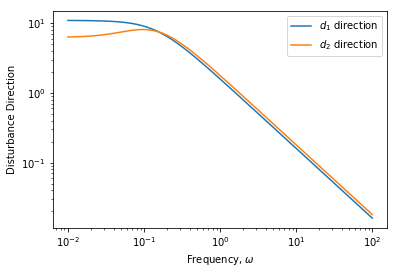

In [34]:
plt.loglog(omega, numpy.array(gd1), label='$d_1$ direction')
plt.loglog(omega, numpy.array(gd2), label='$d_2$ direction')
plt.xlabel("Frequency, $\omega$")
plt.ylabel("Disturbance Direction")
plt.legend(loc = 0)

# For Perfect Control

In [35]:
Kc = 1
def G(s):
    G11 = 4.29 * numpy.exp(-2.6 * s) / ((6.7 * s + 1))
    G12 = -2.38 * numpy.exp(-3.5 * s) / ((8.64 * s + 1))
    G13 = -2.156 * numpy.exp(-s) / ((9.06 * s + 1))
    G21 = 7.215 * numpy.exp(-6.5 * s) / ((3.25 * s + 1))
    G22 = -9.218 * numpy.exp(-3.0 * s) / ((5.0 * s + 1))
    G23 = -2.156 * numpy.exp(-s) / ((9.06 * s + 1))
    G31 = -0.5635 * numpy.exp(-9.2 * s) / ((8.15 * s + 1))
    G32 =  0.451143 * numpy.exp(-9.4 * s) / ((10.9 * s + 1))
    G33 = 1.1 * (10.1*s + 0.87) * numpy.exp(-s) / ((3.89 * s + 1)*(18.8*s + 1))
    return numpy.diag([Kc, Kc, Kc])*numpy.matrix([[G11, G12, G13],
                         [G21, G22, G23],
                         [G31, G32, G33]])

In [36]:
def sigma(Gfr):
    return numpy.linalg.svd(Gfr)

In [37]:
def S(s):
    return numpy.eye(3) + numpy.diag([Kc, Kc, Kc])*G(s)

In [38]:
S_freq_responses = [S(si) for si in s]

In [39]:
S_sigmas = [sigma(G_fr)[1] for G_fr in S_freq_responses]

Text(0, 0.5, 'Magnitude')

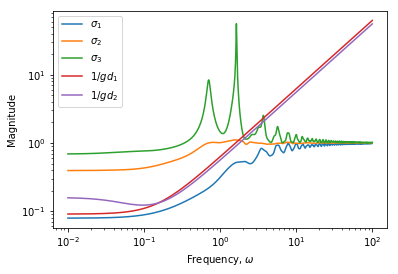

In [40]:
S_sigmas = numpy.array(S_sigmas)
plt.loglog(omega, 1/S_sigmas[:,0], label = '$\sigma_1$')
plt.loglog(omega, 1/S_sigmas[:,1], label = '$\sigma_2$')
plt.loglog(omega, 1/S_sigmas[:,2], label = '$\sigma_3$')
plt.loglog(omega, 1/numpy.array(gd1), label = "1/$gd_1$")
plt.loglog(omega, 1/numpy.array(gd2), label = "1/$gd_2$")

plt.legend(loc = 0)
plt.xlabel('Frequency, $\omega$')
plt.ylabel('Magnitude')

In [41]:
GGd1 = [numpy.linalg.inv(G(si))*Gd(si)[:,0] for si in s]
GGd2 = [numpy.linalg.inv(G(si))*Gd(si)[:,1] for si in s]

In [42]:
sGGd1 = [sigma(Gi)[1] for Gi in GGd1]
sGGd2 = [sigma(Gi)[1] for Gi in GGd2]

In [43]:
GGd3 = [numpy.linalg.inv(G(si))*Gd(si) for si in s]

In [44]:
maxsumnorm = [numpy.abs(max(sum(GGdi[:,0])), sum(GGdi[:,1]))[0,0] for GGdi in GGd3]
single_dist1 = numpy.array([GGdi[:,1] for GGdi in GGd3])

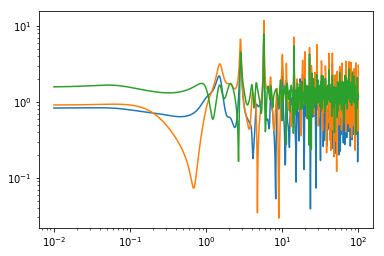

In [45]:
plt.loglog(omega, abs(single_dist1[:,0]))
plt.loglog(omega, abs(single_dist1[:,1]))
plt.loglog(omega, abs(single_dist1[:,2]))

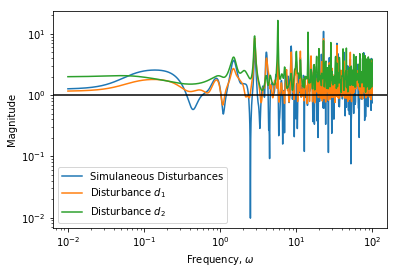

In [47]:
plt.loglog(omega, maxsumnorm, label="Simulaneous Disturbances")
plt.loglog(omega, sGGd1, label = "Disturbance $d_1$")
plt.loglog(omega, sGGd2, label = "Disturbance $d_2$")
plt.axhline(1, color = 'k')

plt.xlabel('Frequency, $\omega$')
plt.ylabel('Magnitude')
plt.legend(loc = 0)

# For Acceptable Control

In [48]:
UhGd = [numpy.linalg.svd(G(si))[0].getH()*Gd(si) for si in s]
sigmaG = [numpy.linalg.svd(G(si))[1] for si in s]

In [49]:
Final1 = numpy.array([UhGd[i][0,:] for i in range(len(sigmaG))])

Text(0, 0.5, 'Magnitude')

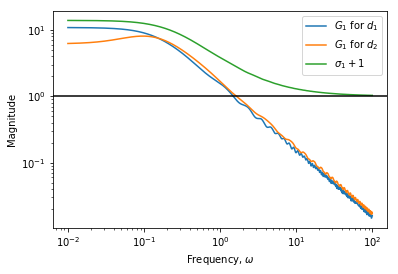

In [50]:
plt.loglog(omega, abs(Final1[:,0][:,0]), label = "$G_1$ for $d_1$")
plt.loglog(omega, abs(Final1[:,0][:,1]), label = "$G_1$ for $d_2$")
plt.loglog(omega, numpy.array(sigmaG)[:,0] + 1, label = "$\sigma_1 + 1$")
# plt.ylim([10E-2, 15])
plt.axhline(1, color = 'k')

plt.legend(loc = 0)
plt.xlabel('Frequency, $\omega$')
plt.ylabel('Magnitude')

In [51]:
Final2 = numpy.array([UhGd[i][1,:] for i in range(len(sigmaG))])

Text(0, 0.5, 'Magnitude')

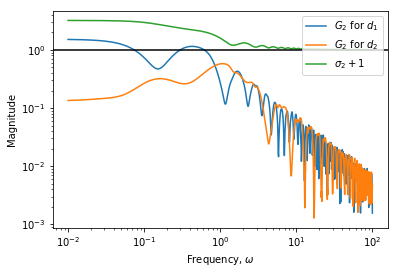

In [52]:
plt.loglog(omega, abs(Final2[:,0][:,0]), label = "$G_2$ for $d_1$")
plt.loglog(omega, abs(Final2[:,0][:,1]), label = "$G_2$ for $d_2$")
plt.loglog(omega, numpy.array(sigmaG)[:,1] + 1, label = "$\sigma_2 + 1$")
# plt.ylim([10E-2, 4])
plt.axhline(1, color = 'k')
plt.legend(loc = 1)
plt.xlabel('Frequency, $\omega$')
plt.ylabel('Magnitude')

In [53]:
Final3 = numpy.array([UhGd[i][2,:] for i in range(len(sigmaG))])

Text(0, 0.5, 'Magnitude')

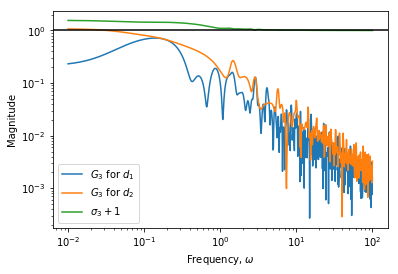

In [54]:
plt.loglog(omega, abs(Final3[:,0][:,0]), label = "$G_3$ for $d_1$")
plt.loglog(omega, abs(Final3[:,0][:,1]), label = "$G_3$ for $d_2$")
plt.loglog(omega, numpy.array(sigmaG)[:,2] + 1, label = "$\sigma_3 + 1$")
# plt.ylim([10E-2, 2])
plt.axhline(1, color = 'k')
plt.legend(loc = 0)
plt.xlabel('Frequency, $\omega$')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

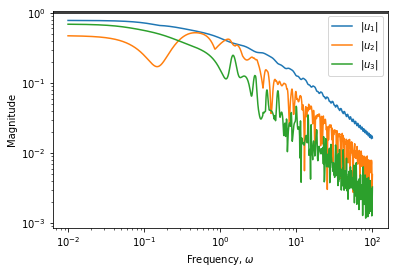

In [55]:
plt.loglog(omega, [numpy.max((abs(numpy.array(Finali))/(numpy.array(sigmaG)[:,0][i]+1))) for i, Finali in enumerate(Final1)], label = "$|u_1|$")
plt.loglog(omega, [numpy.max((abs(numpy.array(Finali))/(numpy.array(sigmaG)[:,1][i]+1))) for i, Finali in enumerate(Final2)], label = "$|u_2|$")
plt.loglog(omega, [numpy.max((abs(numpy.array(Finali))/(numpy.array(sigmaG)[:,2][i]+1))) for i, Finali in enumerate(Final3)], label = "$|u_3|$")
plt.axhline(1, color = 'k')
plt.legend(loc = 0)
# plt.xlim(0.01, 1)
plt.xlabel("Frequency, $\omega$")
plt.ylabel("Magnitude")

In [28]:
u1_max = max([numpy.max((abs(numpy.array(Finali))/(numpy.array(sigmaG)[:,0][i]+1))) for i, Finali in enumerate(Final1)])
u2_max = max([numpy.max((abs(numpy.array(Finali))/(numpy.array(sigmaG)[:,1][i]+1))) for i, Finali in enumerate(Final2)])
u3_max = max([numpy.max((abs(numpy.array(Finali))/(numpy.array(sigmaG)[:,2][i]+1))) for i, Finali in enumerate(Final3)])

In [29]:
u1_max, u2_max, u3_max

(0.7807650626581197, 0.4730467720503362, 0.6902514082323309)